Question 2: Please add the following calculated columns to the dataframe (plus any others you found helpful). 

Dynamic Columns (These vary by loan and by calendar month):

- current_balance: The current balance outstanding for each loan and month.
- seasoning: The integer number of months since the loan was originated at each month.
- n_missed_payments: number of missed payments in a row.
- prepaid_in_month: a flag indicating that the borrower prepaid in a given month.
- default_in_month: a flag indicating that the borrower defaulted in a given month.
- recovery_in_month: a flag indicating that a recovery has been made post-default in a given month.
- is_recovery_payment: a flag indicating whether the associated payment has been made post-default.
- time_to_reversion: The integer number of months until the laon reverts. This is negative if the - loan is before reversion and 0 at the month of reversion.
- is_post_seller_purchsae_date: Is this time period after the seller purchased this loan.


Static Columns (These vary by loan but are the same for each calendar month):

- postdefault_recoveries: The cumulative recoveries post-default.
- prepayment_date: The date that the loan prepays (or nan if it does not).
- date_of_default: the date that the loan defaults (or nan if it does not).
- date_of_recovery: the date that a recovery is made on the loan, post-default.
- exposure_at_default: the current balance of the loan outstanding at default.
- recovery_percent: the postdefault_recoveries as a percentage of the exposure at default.

In [1]:
import pandas as pd
from case_functions import create_extended_data_portfolio

import matplotlib.pyplot as plt

In [2]:
test = create_extended_data_portfolio()

/Users/dialidsantiago/Git/strat-case-study-draft/case/case_functions.py:106: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  extended_data = pd.concat(extended_subdatas)


In [3]:
test.loan_id.unique()

array([   1,    2,    3, ..., 1628, 1629, 1630])

In [4]:
my_id = 1500
dt = test[test.loan_id == my_id]
dt

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,defaulted,not_defaulted,recovery_in_month,time_to_reversion,is_post_seller_purchsae_date,postdefault_recoveries,prepayment_date,date_of_default,exposure_at_default,recovery_percent
38261,1500,2022-09-30,82927.0,NaN,0.000000,2022-09-30,2022-09-30,2024-09-30,82927,2,...,0,-1,False,-24,False,0.0,NaT,NaT,NaN,NaN
38262,1500,2022-10-31,82927.0,546.108435,546.108435,2022-09-30,2022-09-30,2024-09-30,82927,2,...,0,-1,False,-23,True,0.0,NaT,NaT,NaN,NaN
38263,1500,2022-11-30,82927.0,546.108435,546.108435,2022-09-30,2022-09-30,2024-09-30,82927,2,...,0,-1,False,-22,True,0.0,NaT,NaT,NaN,NaN
38264,1500,2022-12-31,82927.0,546.108435,546.108435,2022-09-30,2022-09-30,2024-09-30,82927,2,...,0,-1,False,-21,True,0.0,NaT,NaT,NaN,NaN


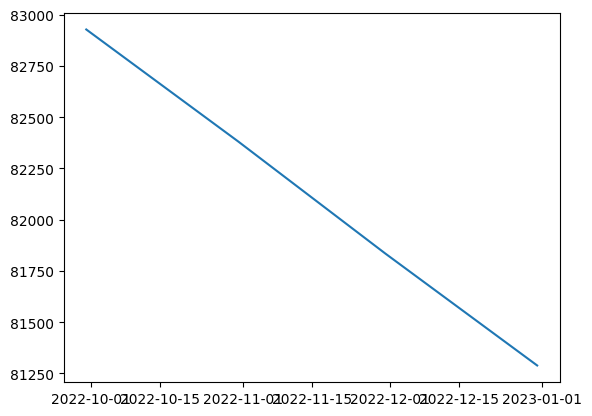

In [5]:
plt.plot(dt.level_1, dt.current_balance)
plt.show()